In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [13]:
df = pd.read_excel(r'C:\Users\Kashi\Downloads\Airlines.xlsx', header = 0)
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [14]:
df.shape

(96, 2)

In [15]:
df["Month"]=pd.to_datetime(df["Month"],errors = 'ignore')

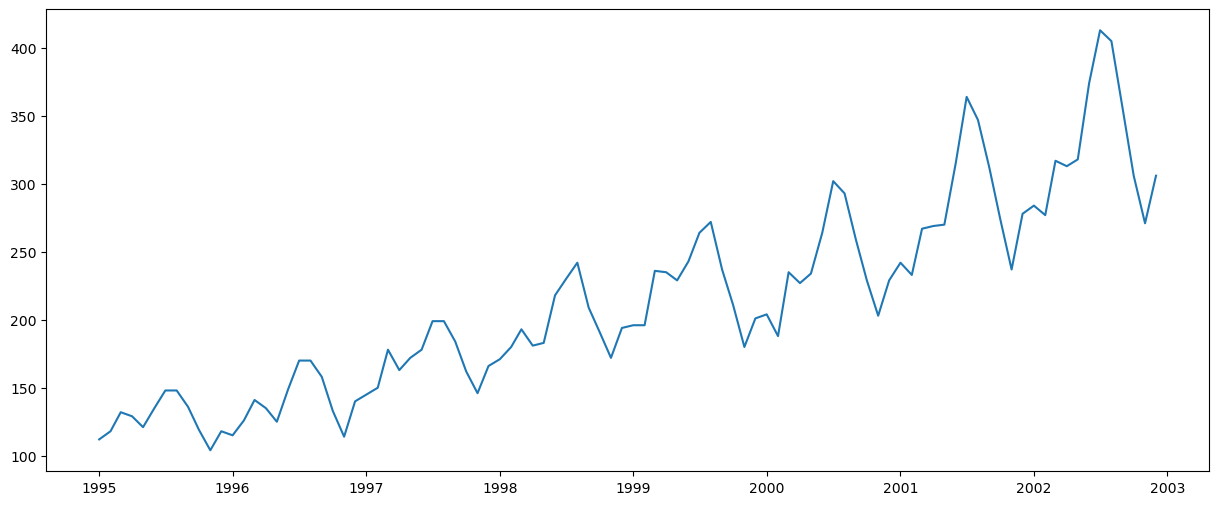

In [16]:
plt.figure(figsize=(15,6))
#Walmart.Footfalls.plot()
plt.plot(df["Month"], df['Passengers'])

In [17]:
Train = df.head(84)
Test = df.tail(12)
Test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


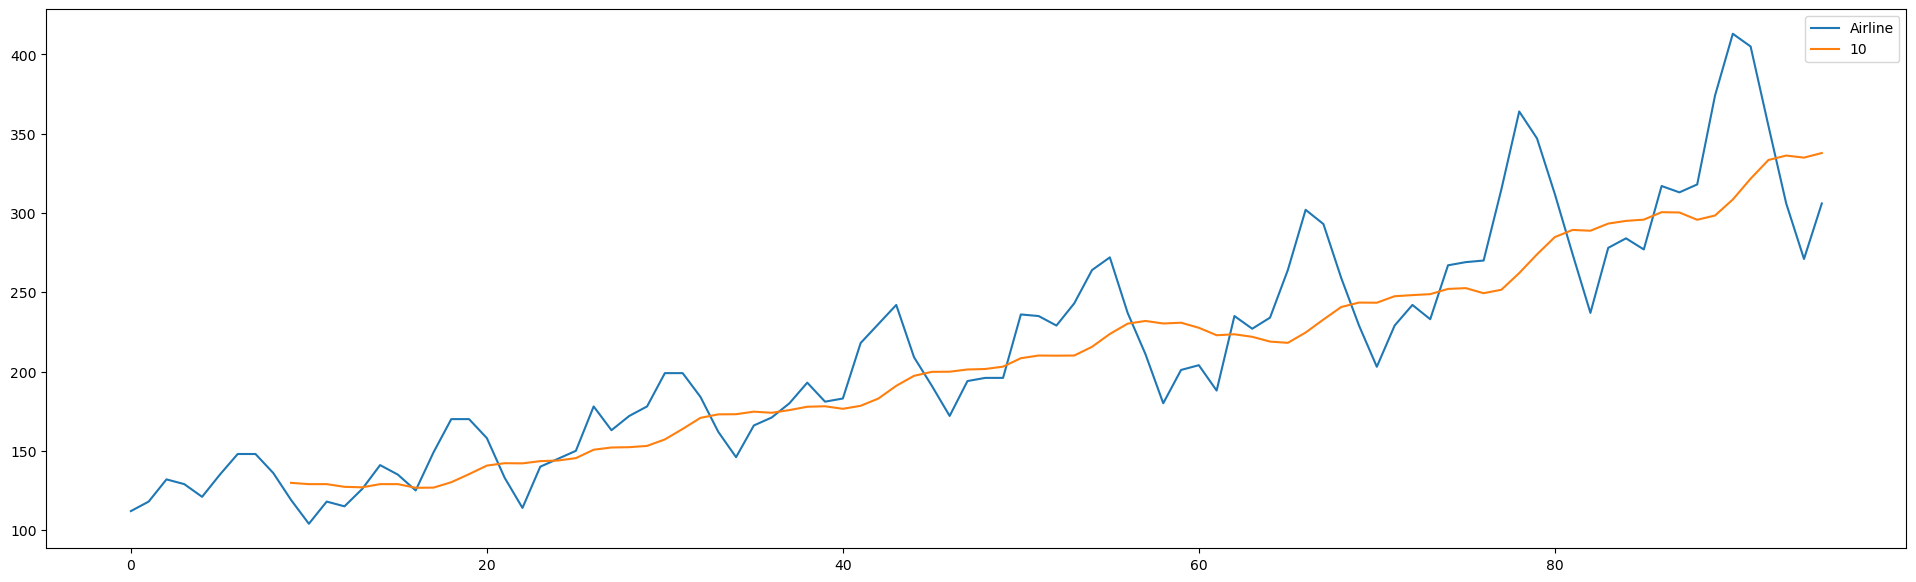

In [18]:
plt.figure(figsize=(24,7))
df.Passengers.plot(label="Airline")
pred = pd.DataFrame()
pred["Moving_Avg"] = df["Passengers"].rolling(10).mean()
pred["Moving_Avg"].plot(label=str(10))
plt.legend(loc='best')

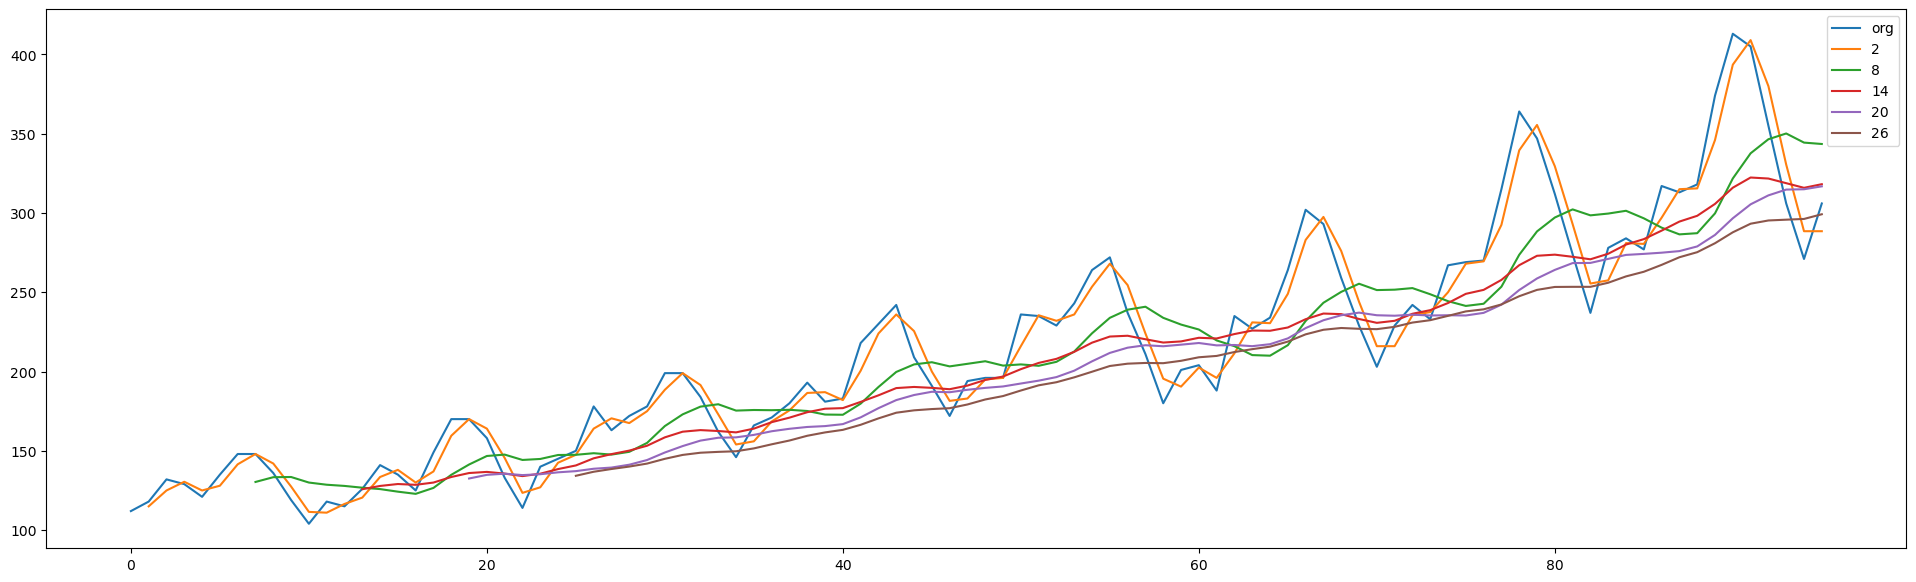

In [20]:
plt.figure(figsize=(24,7))
df.Passengers.plot(label="org")
for i in range(2,30,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

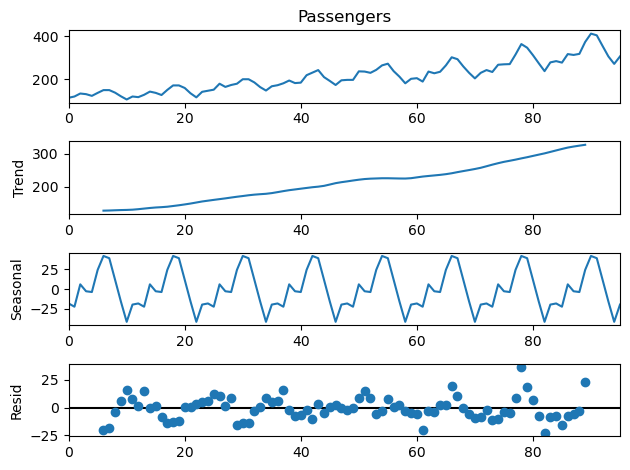

In [21]:
#Time series decomposition
decompose_ts_add = seasonal_decompose(df.Passengers,period= 12)
decompose_ts_add.plot()
plt.show()

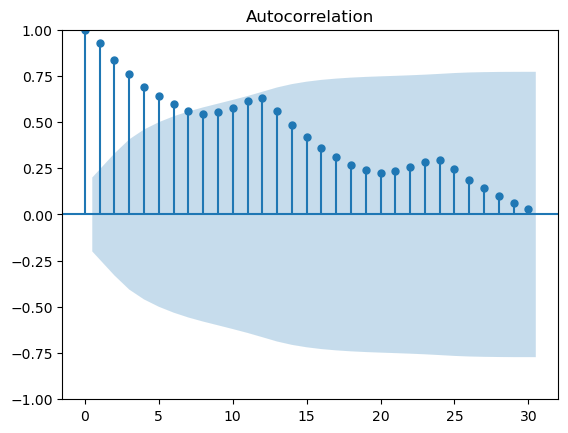

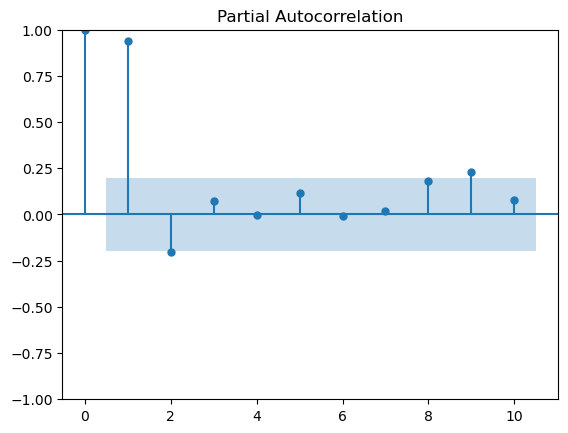

In [24]:
#ACF AND PACF PLOTS
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=30)
tsa_plots.plot_pacf(df.Passengers,lags=10)
plt.show()


In [27]:
#EVALUATION METRIC - MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [28]:
#SIMPLE EXPONENTIAL METHOD
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.7)
pred_ses = pd.DataFrame()
pred_ses["Exp_Smoothing"] = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses["Exp_Smoothing"],Test.Passengers)

16.12300075964089

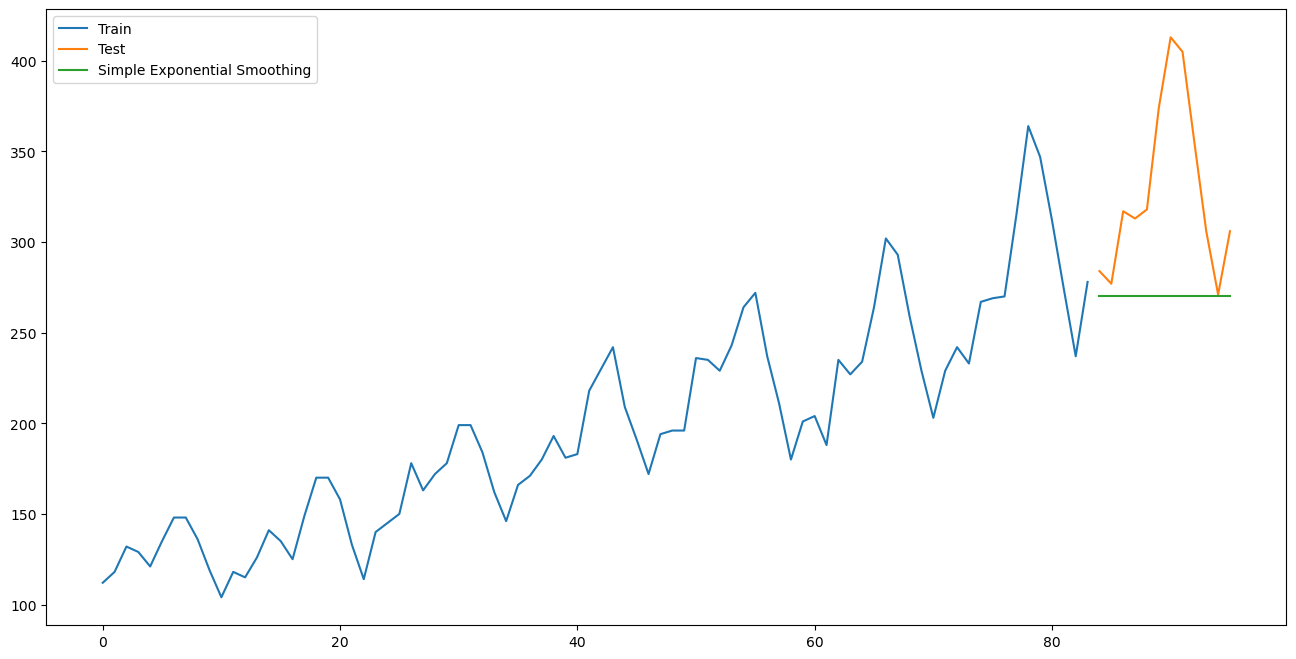

In [29]:
plt.figure(figsize=(16,8))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test["Passengers"], label='Test')
plt.plot(pred_ses["Exp_Smoothing"], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

In [32]:
#HOLT METHOD 
hw_model = Holt(Train['Passengers']).fit(smoothing_level=0.2, smoothing_trend = 0.15)
pred_hw = pd.DataFrame()
pred_hw['holt_method']= hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw['holt_method'], Test.Passengers)

10.523282440903783

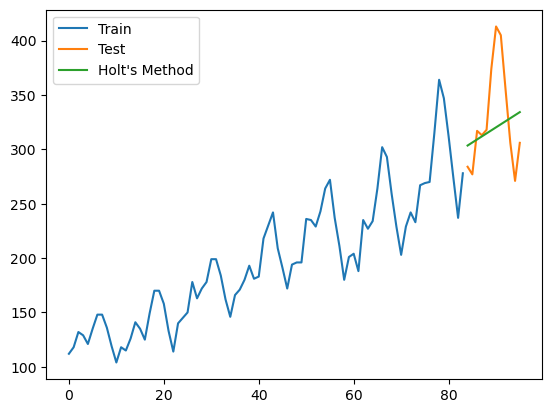

In [36]:
plt.plot(Train['Passengers'], label = 'Train')
plt.plot(Test['Passengers'], label = 'Test')
plt.plot(pred_hw['holt_method'], label = "Holt's Method")
plt.legend(loc = 'best')
plt.show()

In [37]:
#Holts winter exponential smoothing with additive seasonality and additive trend¶
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = pd.DataFrame()
pred_hwe_add_add["holt_winter_method"] = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add["holt_winter_method"],Test.Passengers)

5.730704946852847

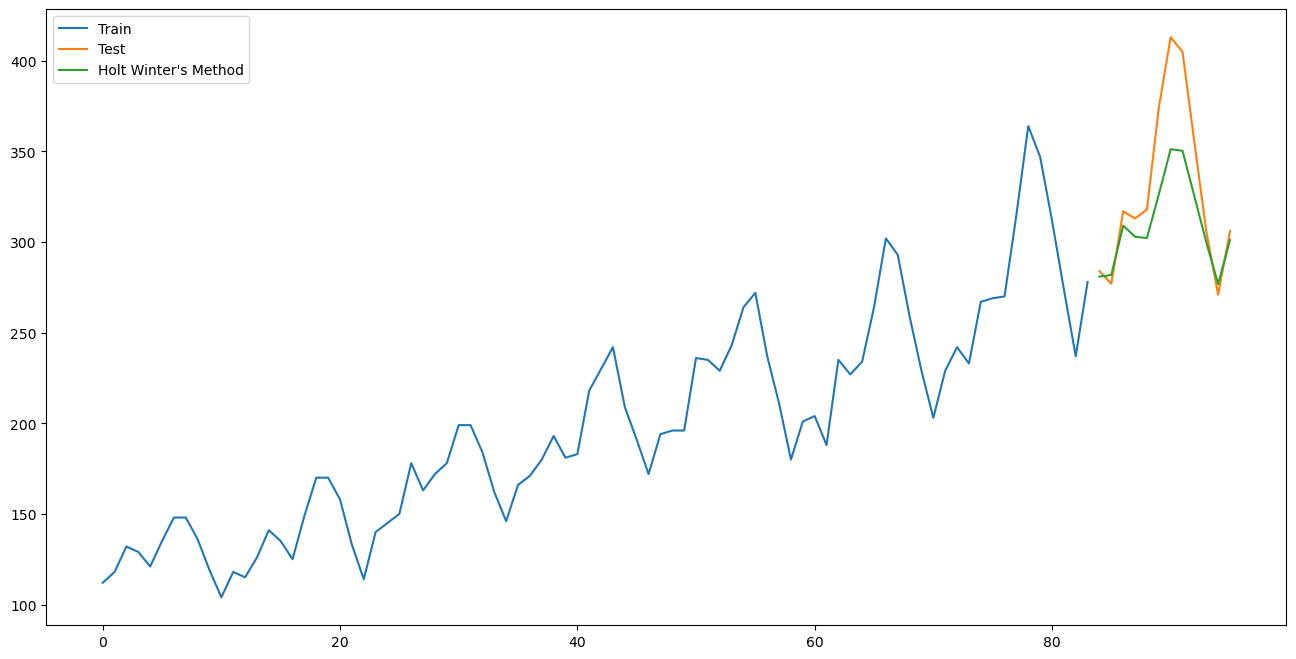

In [38]:
plt.figure(figsize=(16,8))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test["Passengers"], label='Test')
plt.plot(pred_hwe_add_add["holt_winter_method"], label="Holt Winter's Method")
plt.legend(loc='best')
plt.show()

In [39]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = pd.DataFrame()
pred_hwe_mul_add["holt_winter_mul"] = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add["holt_winter_mul"] ,Test.Passengers)

2.821093186644687

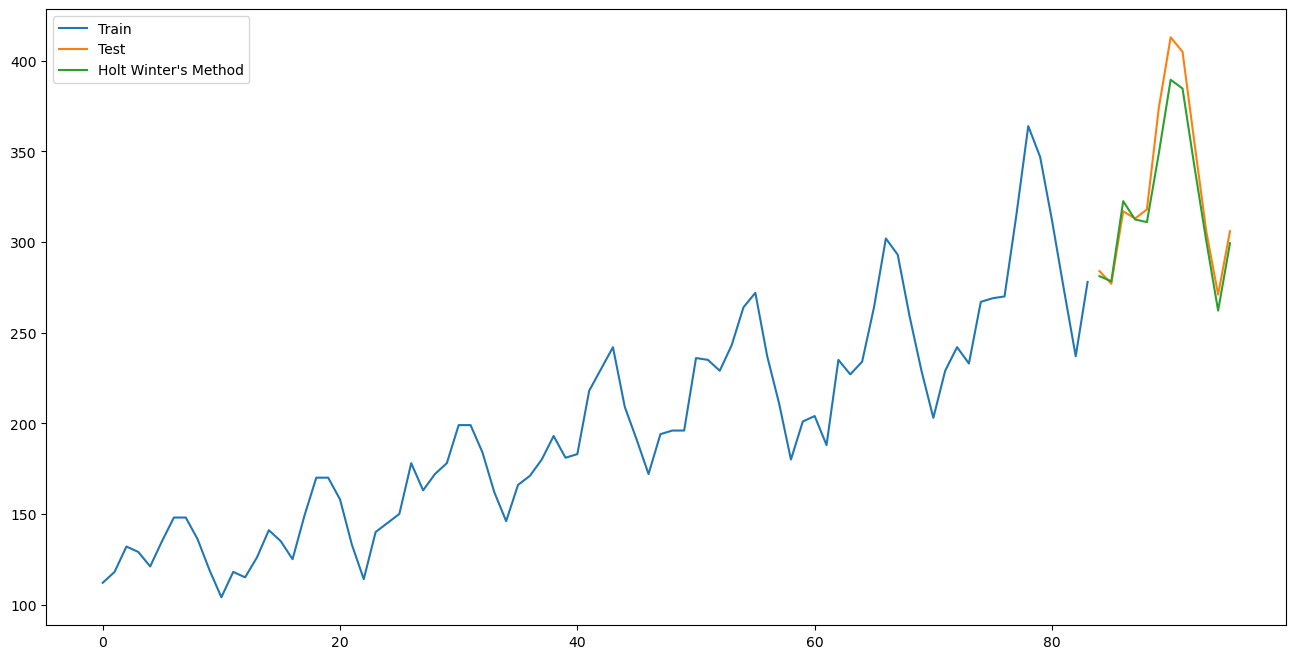

In [40]:
plt.figure(figsize=(16,8))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test["Passengers"], label='Test')
plt.plot(pred_hwe_mul_add["holt_winter_mul"], label="Holt Winter's Method")
plt.legend(loc='best')
plt.show()

In [41]:
#FINAL MODEL
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [42]:
forecast = hwe_model_mul_add.forecast(10)
forecast

84    281.192233
85    278.384264
86    322.559405
87    312.456281
88    311.023769
89    348.875132
90    389.545716
91    384.751067
92    341.857688
93    300.736631
dtype: float64